In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each category (excluding the first value)
categories = ["diff", "Greedy", "Local Alignment", "Nonlocal Alignment"]
diff_values = [0, 0, 0, 0.25, 0.25]
provScope_values = [0.2, 0.25, 0.375, 0.4, 0.4444444444]
localAlignment_values = [1, 1, 1, 1, 1]
globalAlignment_values = [1, 1, 1, 1, 1]

# Module names
modules = ["mini mcb", "AMG 2013", "SMG (hypre)", "PCG (hypre)", "PFMG (hypre)"]

# Transpose data for grouping
all_values = np.array([diff_values, provScope_values, localAlignment_values, globalAlignment_values])
num_modules = all_values.shape[1]  # Number of values in each category
num_categories = len(categories)


In [2]:
# Set up bar graph parameters
x_positions = np.arange(num_modules)  # Base x-positions for groups
bar_width = 0.2  # Width of each bar
offsets = np.arange(num_categories) * bar_width  # Offsets for each category in a group

# Patterns for black-and-white distinguishability
patterns = ["//", "\\\\", "xx", "oo"]
colors = ["skyblue", "lightgreen", "salmon", "lightgray"]

# Font settings for bold and large text
font_settings = {"fontsize": 18, "fontweight": "bold"}



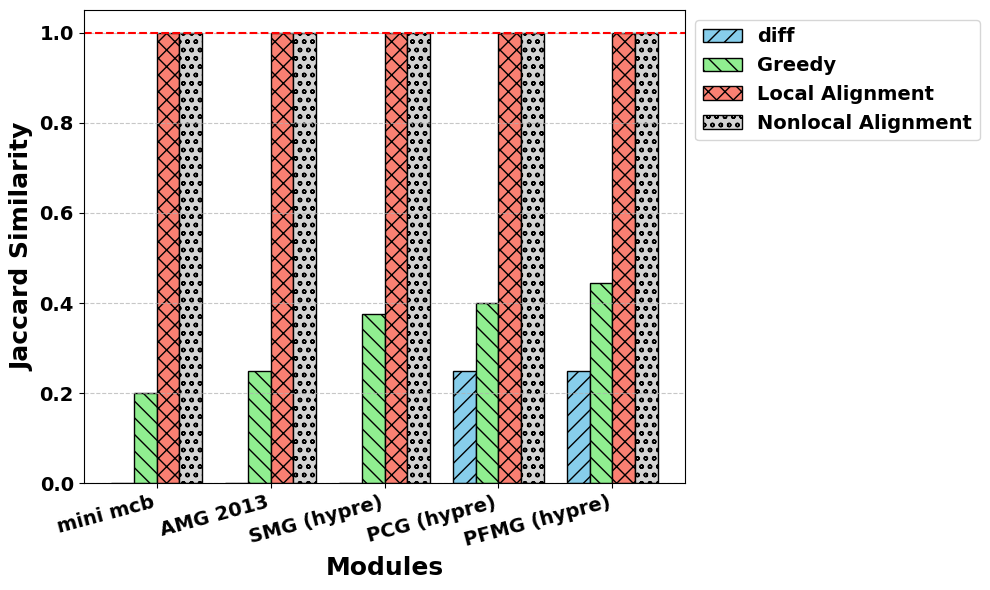

In [3]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the grouped bars
for i, (category, pattern, color) in enumerate(zip(categories, patterns, colors)):
    ax.bar(
        x_positions + offsets[i],  # Adjust x-positions for each category
        all_values[i],             # Data for the category
        width=bar_width,
        label=category,
        color=color,
        edgecolor="black",
        hatch=pattern
    )

# Add customizations
ax.set_xlabel("Modules", **font_settings)
ax.set_ylabel("Jaccard Similarity", **font_settings)
# ax.set_title("Accuracy of Points of Divergence", **font_settings)
ax.set_xticks(x_positions + bar_width * (num_categories - 1) / 2)  # Center the group labels
ax.set_xticklabels(modules, fontsize=14, fontweight="bold", rotation=15, ha="right")  # Rotate and align labels
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Emphasize the Jaccard Similarity limit
ax.axhline(y=1, color="red", linestyle="--", linewidth=1.5)

# Customize legend to be bold and large
ax.legend(
#     title="Categories",
    fontsize=16,  # Larger font size
    title_fontsize=16,  # Larger title font size
    loc='upper left',
    bbox_to_anchor=(1, 1),
    frameon=True,
    prop={"weight": "bold",
         "size": 14}  # Bold legend text
)

# Customize tick labels for bold and large text
ax.tick_params(axis="both", labelsize=14)  # Increase tick label size
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight("bold")  # Make tick labels bold

plt.tight_layout()
plt.savefig("accuracy.png", dpi = 300)
plt.show()

In [4]:
plt.clf()

<Figure size 640x480 with 0 Axes>

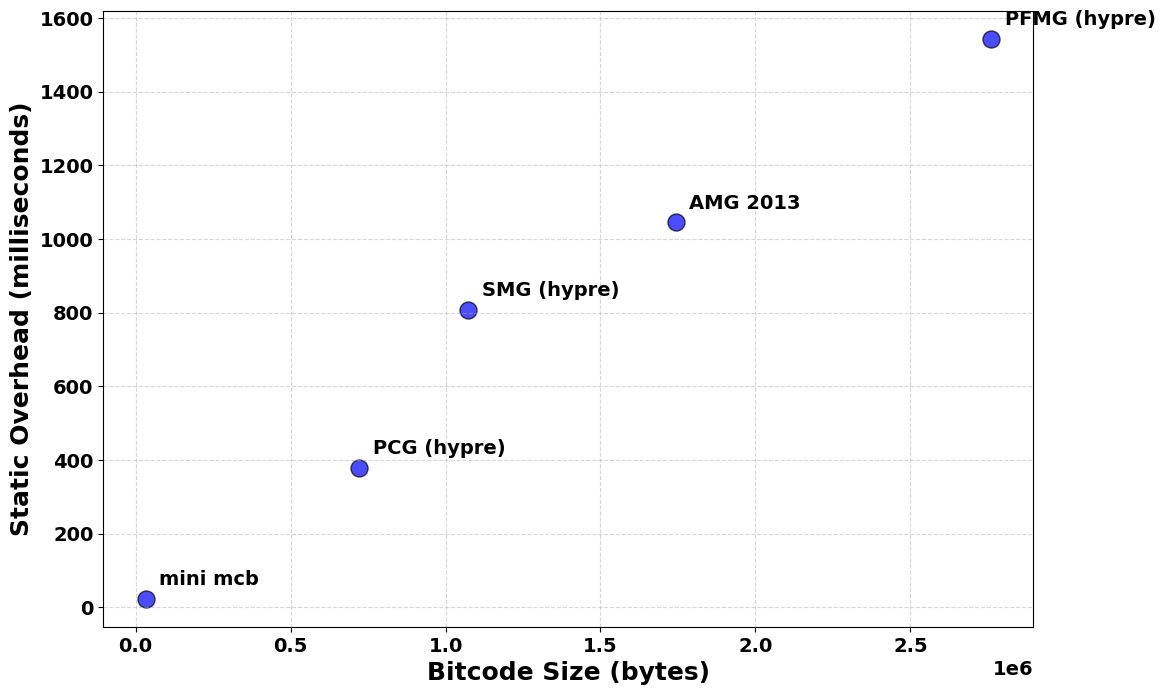

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Provided data
bitcode_size = [31892, 1742312, 1072624, 720372, 2760412]  # Bitcode sizes in bytes
static_overhead = [23.11, 1045.22, 807.698, 379.386, 1544.09]  # Static overhead in milliseconds
modules = ["mini mcb", "AMG 2013", "SMG (hypre)", "PCG (hypre)", "PFMG (hypre)"]  # Module names

# Create the scatter plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
scatter = plt.scatter(bitcode_size, static_overhead, c='blue', alpha=0.7, edgecolors='k', s=150)

# Add labels and title with bold font and large size
plt.xlabel("Bitcode Size (bytes)", fontsize=18, fontweight='bold')
plt.ylabel("Static Overhead (milliseconds)", fontsize=18, fontweight='bold')
# plt.title("Bitcode Size vs Static Overhead with Modules", fontsize=20, fontweight='bold')

# Annotate each point with its corresponding module name
for i, module in enumerate(modules):
    plt.annotate(
        module,
        (bitcode_size[i], static_overhead[i]),
        textcoords="offset points",
        xytext=(10, 10),
        ha='left',
        fontsize=14,
        fontweight='bold'
    )

# Customize scientific notation (1e6) size
ax = plt.gca()  # Get the current axis
ax.xaxis.get_offset_text().set_fontsize(14)
ax.xaxis.get_offset_text().set_fontweight('bold')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust tick labels to be bold and large
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Display the plot
plt.savefig("staticAnalysis.png", format = "png", dpi = 300)



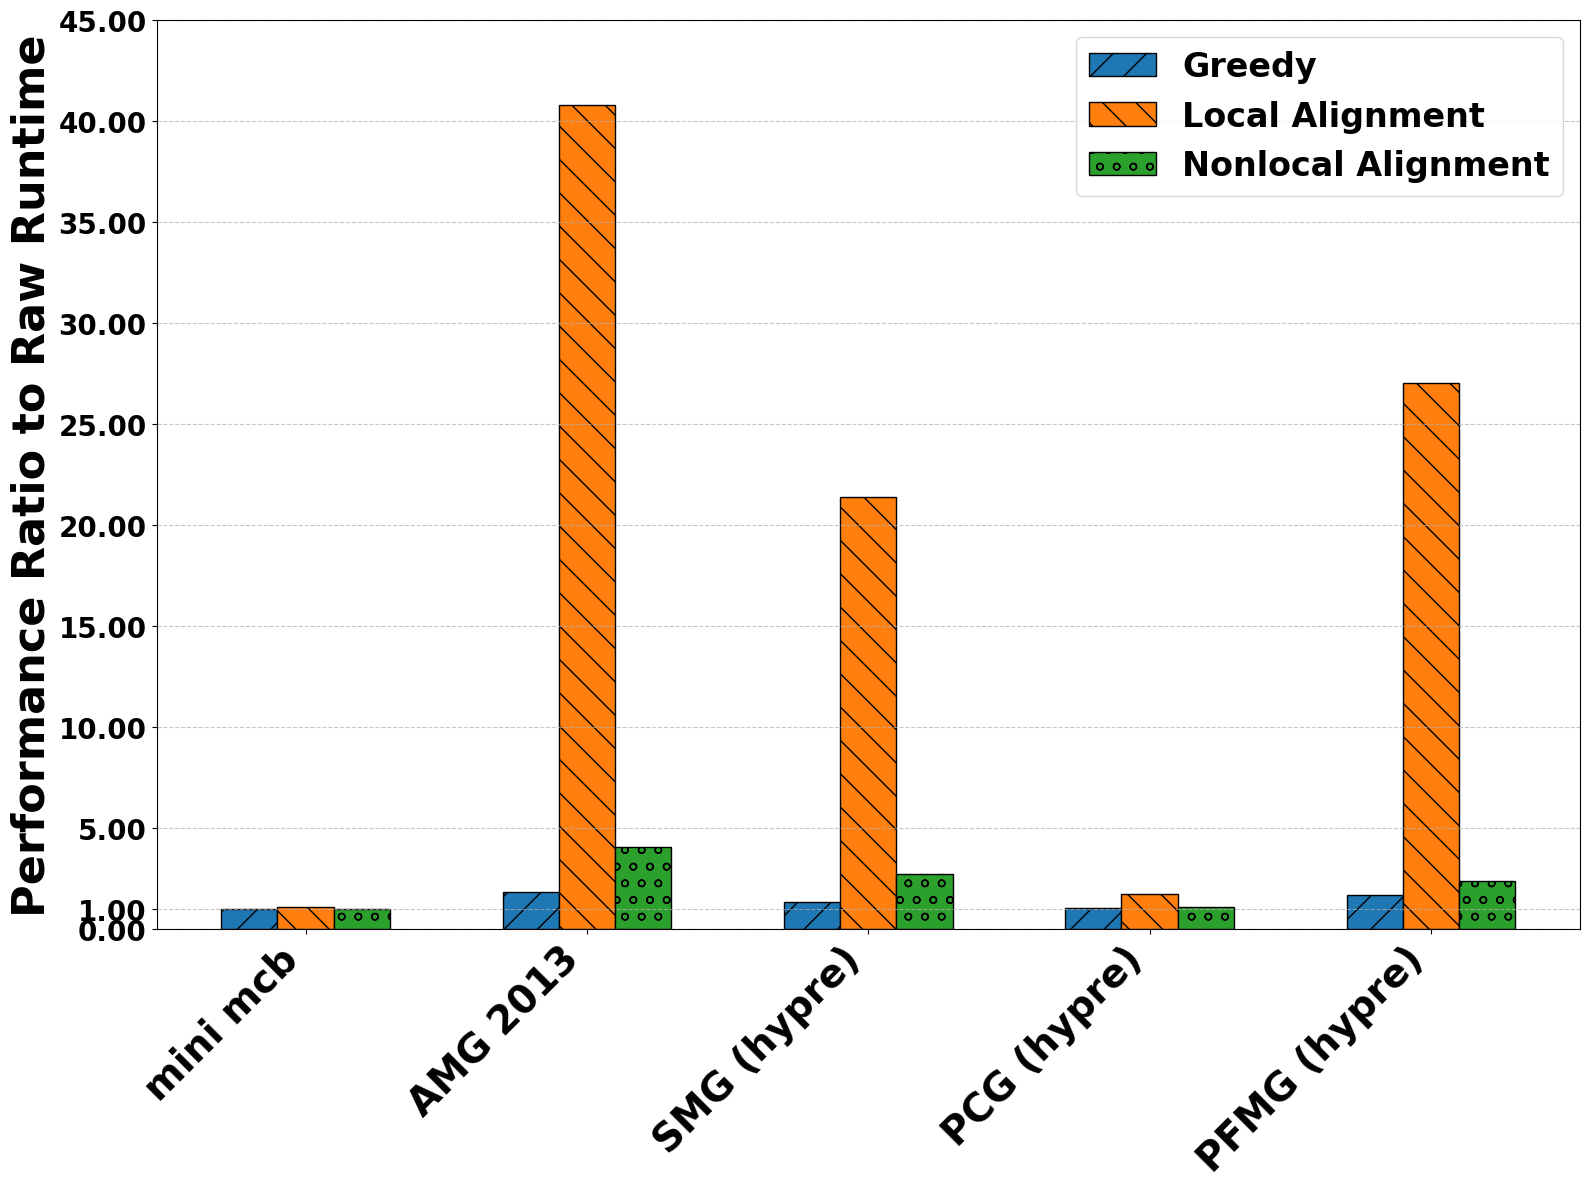

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
modules = ['mini mcb', 'AMG 2013', 'SMG (hypre)', 'PCG (hypre)', 'PFMG (hypre)']
comparison_categories = ['Greedy', 'Local Alignment', 'Nonlocal Alignment']

# Runtime data
raw_runtime = [410.448, 413.611, 424.873, 389.416, 344.399]
comparison_data = [
    [419.494, 459.117, 417.022],    # mini mcb
    [773.315, 16873.309, 1692.645],  # AMG 2013
    [583.572, 9092.227, 1152.962],   # SMG (hypre)
    [408.616, 676.335, 426.038],    # PCG (hypre)
    [579.86, 9304.358, 819.851],   # PFMG (hypre)
]

# Calculate ratios
ratios = [
    [comparison_data[i][j] / raw_runtime[i] for j in range(len(comparison_categories))]
    for i in range(len(modules))
]

# Plotting
x = np.arange(len(modules))  # Label locations
width = 0.2  # Width of bars

# Define hatches for black-and-white distinction
hatches = ['/', '\\', 'o']

fig, ax = plt.subplots(figsize=(16, 12))

# Create bars for comparison categories with hatching
for i, (category, hatch) in enumerate(zip(comparison_categories, hatches)):
    offsets = x + (i - 1) * width
    ax.bar(offsets, [row[i] for row in ratios], width, label=category, hatch=hatch, edgecolor='black')

# Labels and title with maximum font size
ax.set_ylabel('Performance Ratio to Raw Runtime', fontweight='bold', fontsize=32)
ax.set_xticks(x)
ax.set_xticklabels(modules, rotation=45, ha='right', fontweight='bold', fontsize=28)

# Adjust y-axis ticks and make them bold with increased font size
ax.set_yticks(np.append(ax.get_yticks(), 1))
ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontweight='bold', fontsize=20)
ax.set_ylim(bottom=0)

# Customize legend with bold text and maximum font size
legend = ax.legend(fontsize=24, title_fontsize=24)
plt.setp(legend.get_texts(), fontweight='bold')

# Show grid and plot
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("recordOverhead.png", format="png", dpi=300)



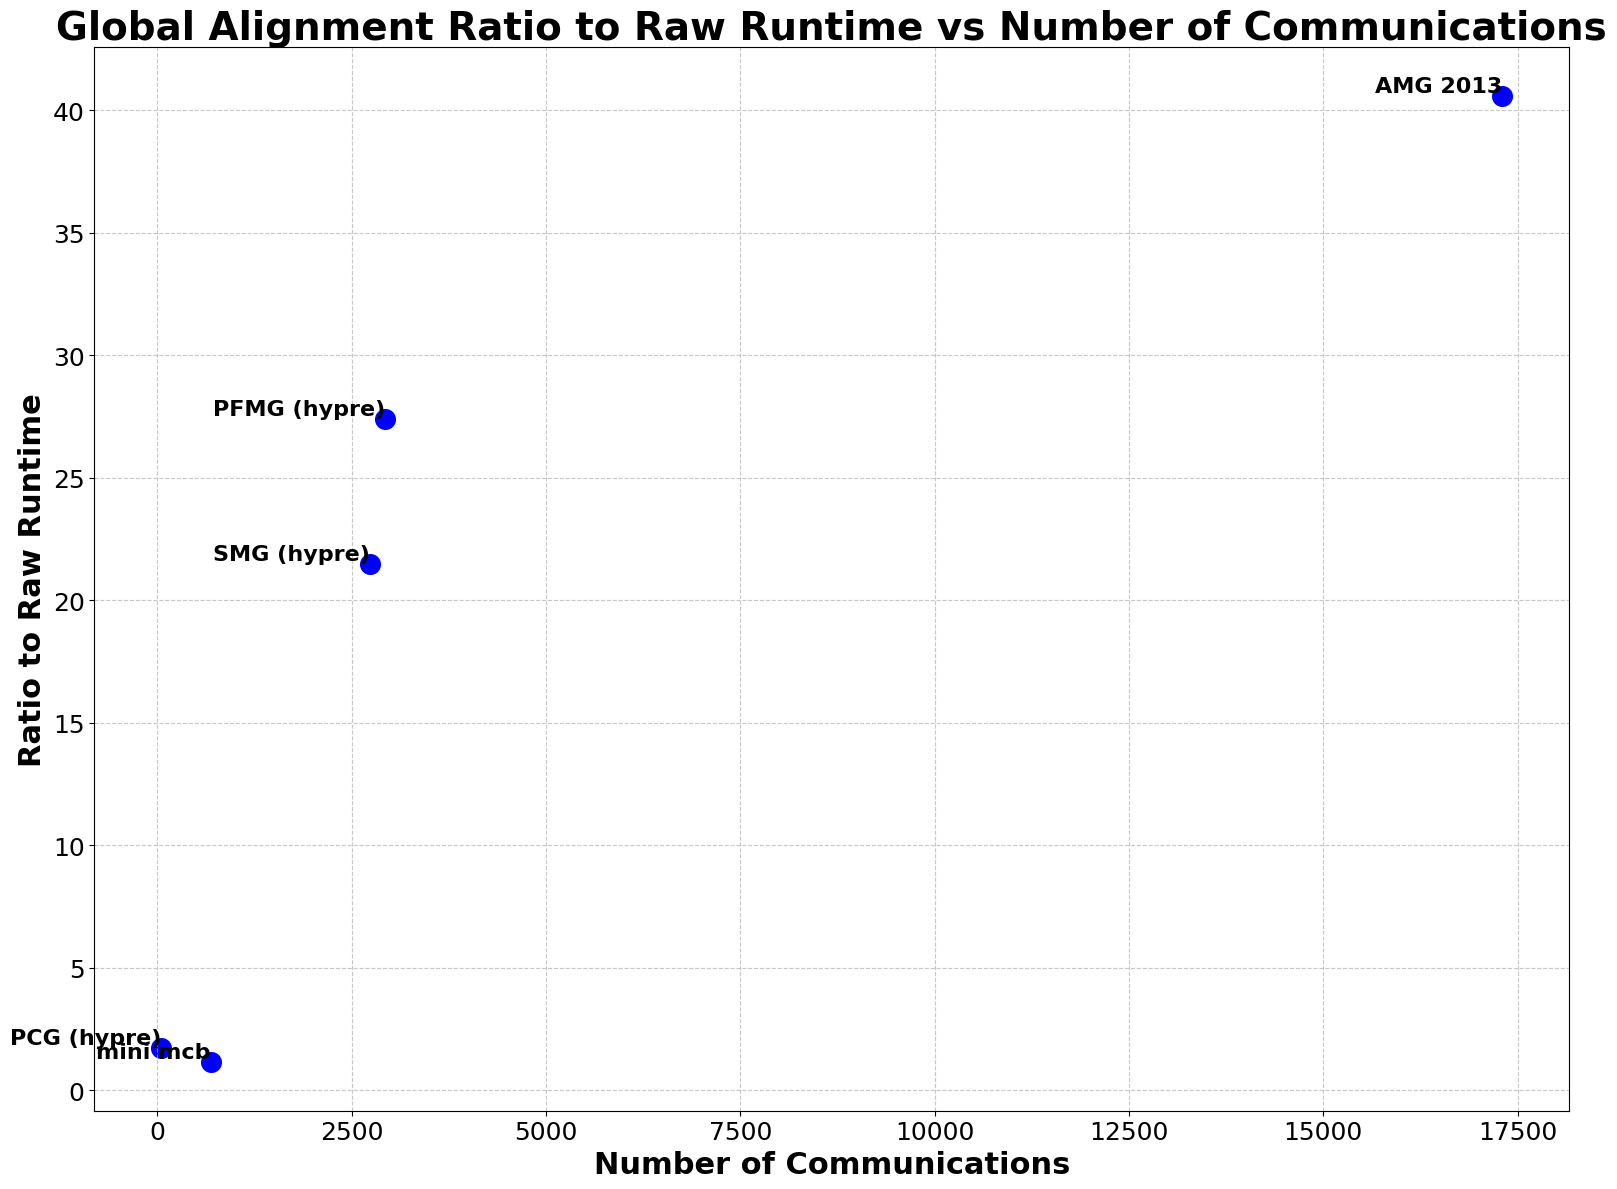

In [7]:
# Data for number of communications
communications = [690, 17304, 2736, 52, 2935]

# Plotting global alignment ratio vs number of communications with module labels
fig, ax = plt.subplots(figsize=(16, 12))

# Data for global alignment
y_values = [ratios[j][2] for j in range(len(modules))]  # Index 2 corresponds to Global Alignment

# Scatter plot for global alignment
ax.scatter(communications, y_values, label="Global Alignment", s=200, color='blue')

# Annotate each dot with the corresponding module name
for i, module in enumerate(modules):
    ax.text(communications[i], y_values[i], module, fontsize=16, fontweight='bold', ha='right', va='bottom')

# Labels and title with maximum font size
ax.set_xlabel('Number of Communications', fontweight='bold', fontsize=22)
ax.set_ylabel('Ratio to Raw Runtime', fontweight='bold', fontsize=22)
ax.set_title('Global Alignment Ratio to Raw Runtime vs Number of Communications', fontweight='bold', fontsize=28)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


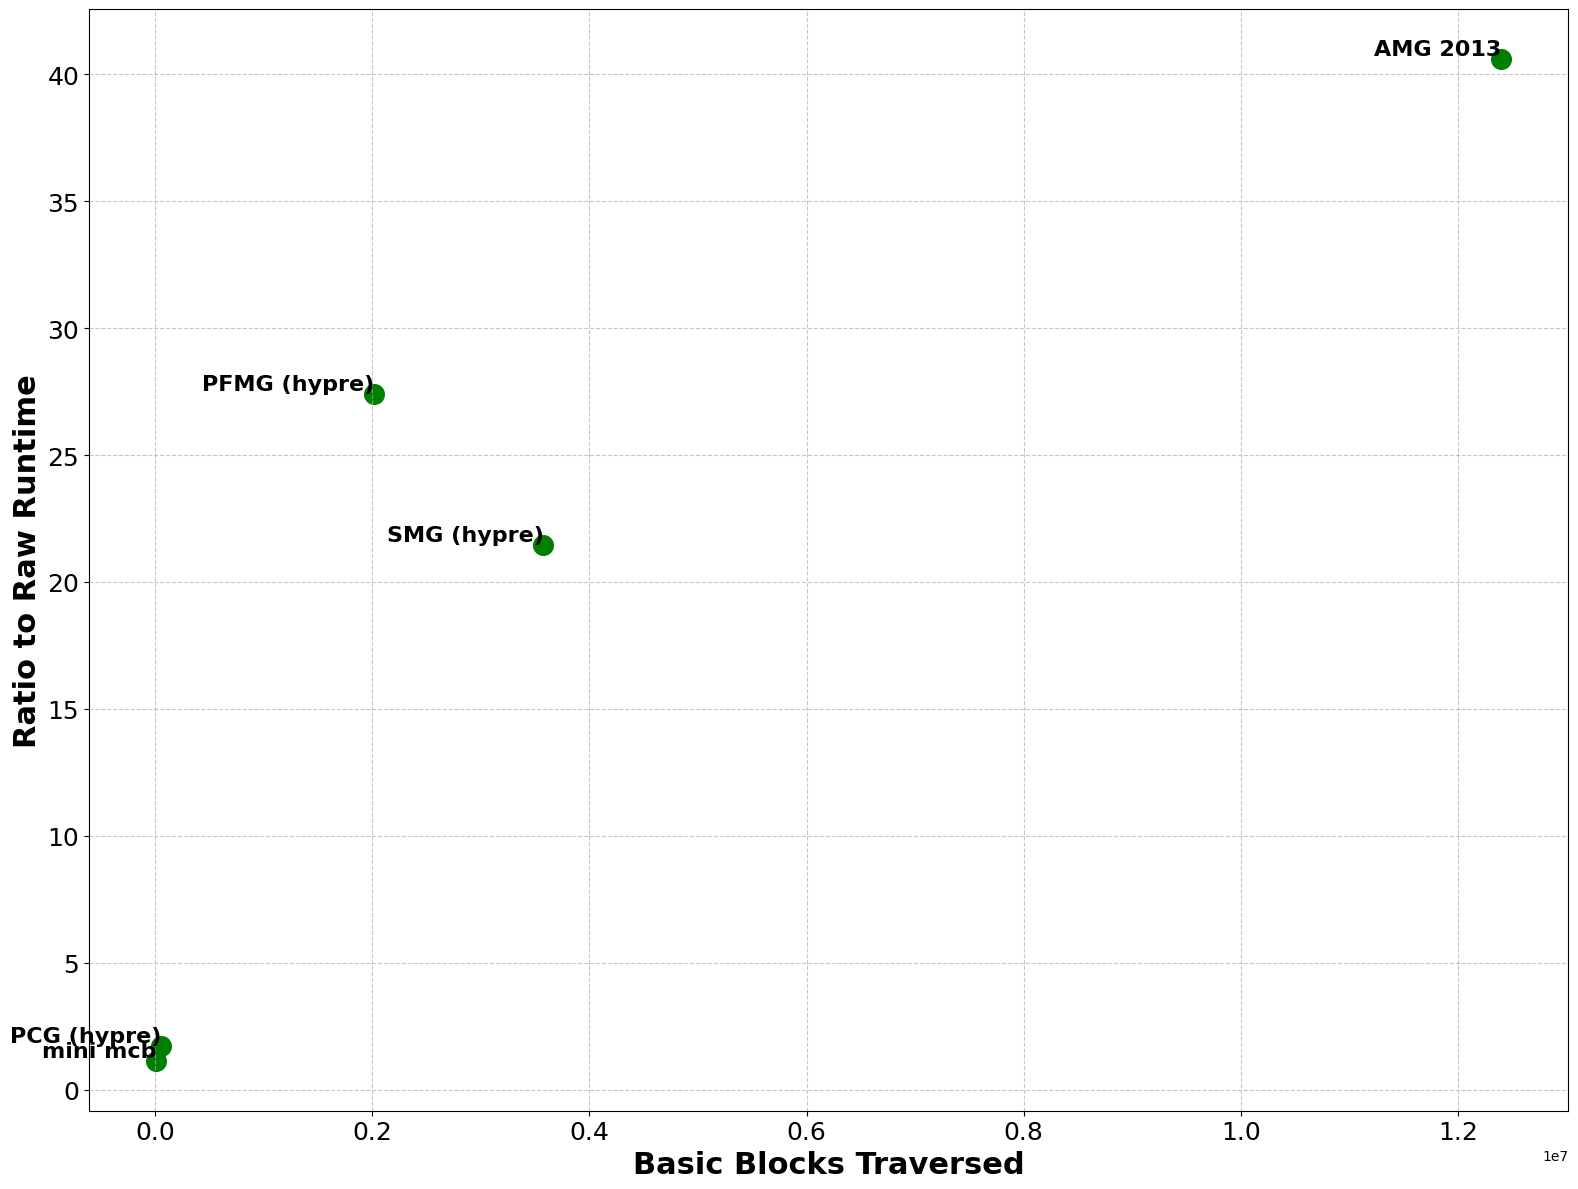

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data for basic blocks traversed
basic_blocks_traversed = [9127, 12396415, 3575865, 57156, 2018789]

# Plotting global alignment ratio vs basic blocks traversed with module labels
fig, ax = plt.subplots(figsize=(16, 12))

# Data for global alignment
y_values = [ratios[j][2] for j in range(len(modules))]  # Index 2 corresponds to Global Alignment

# Scatter plot for global alignment
ax.scatter(basic_blocks_traversed, y_values, label="Global Alignment", s=200, color='green')

# Annotate each dot with the corresponding module name
for i, module in enumerate(modules):
    ax.text(basic_blocks_traversed[i], y_values[i], module, fontsize=16, fontweight='bold', ha='right', va='bottom')

# Labels with maximum font size
ax.set_xlabel('Basic Blocks Traversed', fontweight='bold', fontsize=22)
ax.set_ylabel('Ratio to Raw Runtime', fontweight='bold', fontsize=22)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

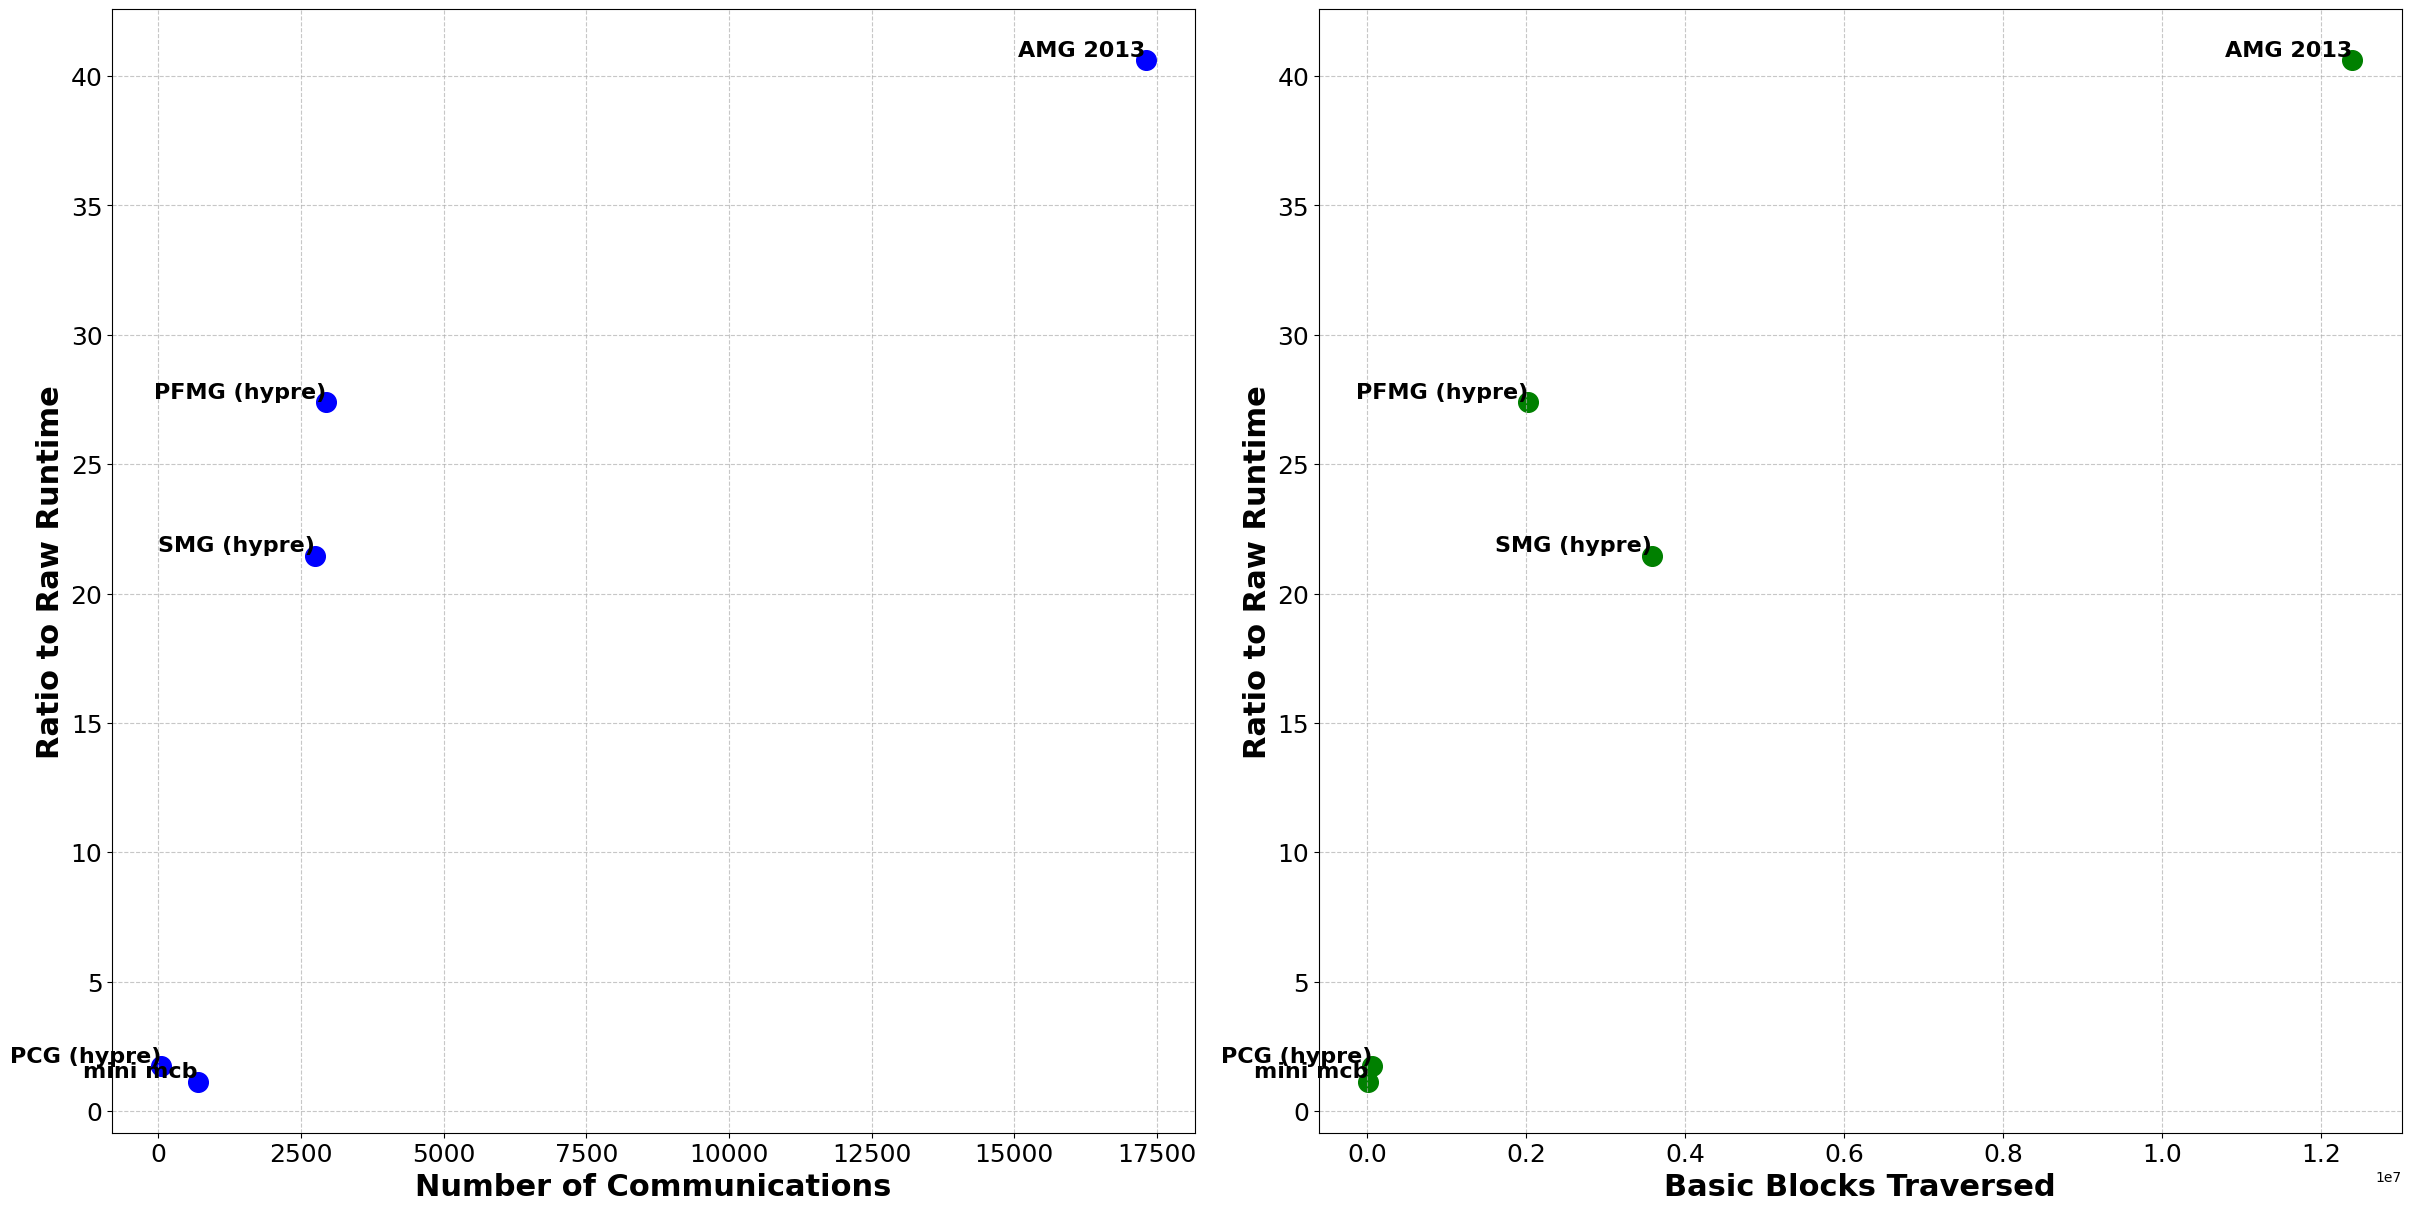

In [10]:
plt.clf()

# Data
communications = [690, 17304, 2736, 52, 2935]
basic_blocks_traversed = [9127, 12396415, 3575865, 57156, 2018789]

# Creating subplots with constrained layout
fig, axs = plt.subplots(1, 2, figsize=(24, 12), constrained_layout=True)

# First scatter plot: Global Alignment ratio vs Number of Communications
y_values_communications = [ratios[j][2] for j in range(len(modules))]  # Global Alignment
axs[0].scatter(communications, y_values_communications, label="Global Alignment", s=200, color='blue')

# Annotate each dot for the first scatter plot
for i, module in enumerate(modules):
    axs[0].text(communications[i], y_values_communications[i], module, fontsize=16, fontweight='bold', ha='right', va='bottom')

# First plot labels
axs[0].set_xlabel('Number of Communications', fontweight='bold', fontsize=22)
axs[0].set_ylabel('Ratio to Raw Runtime', fontweight='bold', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=18)
axs[0].grid(axis='both', linestyle='--', alpha=0.7)

# Second scatter plot: Global Alignment ratio vs Basic Blocks Traversed
y_values_basic_blocks = [ratios[j][2] for j in range(len(modules))]  # Global Alignment
axs[1].scatter(basic_blocks_traversed, y_values_basic_blocks, label="Global Alignment", s=200, color='green')

# Annotate each dot for the second scatter plot
for i, module in enumerate(modules):
    axs[1].text(basic_blocks_traversed[i], y_values_basic_blocks[i], module, fontsize=16, fontweight='bold', ha='right', va='bottom')

# Second plot labels
axs[1].set_xlabel('Basic Blocks Traversed', fontweight='bold', fontsize=22)
axs[1].set_ylabel('Ratio to Raw Runtime', fontweight='bold', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=18)
axs[1].grid(axis='both', linestyle='--', alpha=0.7)

# Show the plots
plt.savefig("causalAnalysis.png", format = "png", dpi = 300)


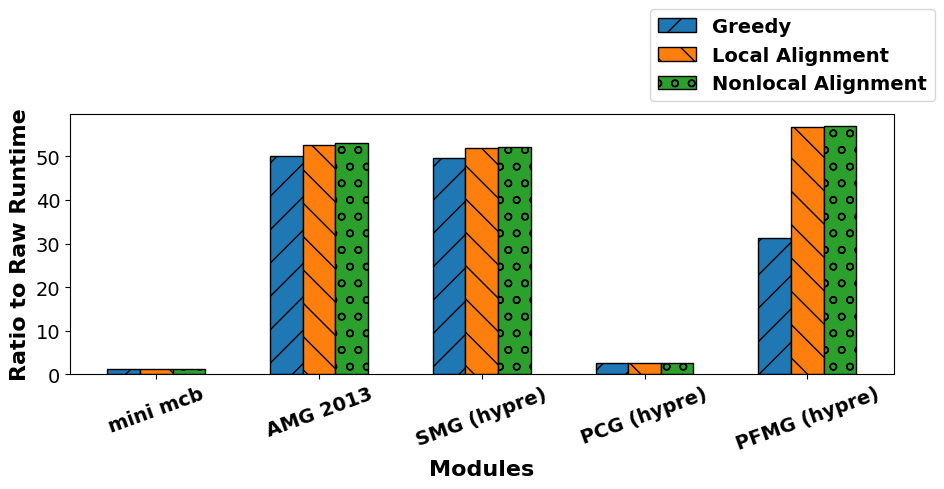

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation
data = {
    "Module": ['mini mcb', 'AMG 2013', 'SMG (hypre)', 'PCG (hypre)', 'PFMG (hypre)'],
    "Raw Runtime": [410.448, 413.611, 424.873, 389.416, 344.399],
    "ProvScope": [476.192, 20686.392, 21142.729, 980.973, 10784.196],
    "Local Alignment": [489.046, 21760.737, 22089.729, 999.53, 19525.358],
    "Global Alignment": [485.905, 21914.298, 22204.264, 1016.24, 19591.46]
}

df = pd.DataFrame(data)

# Calculate results as ratios compared to raw runtime
df["ProvScope Ratio"] = df["ProvScope"] / df["Raw Runtime"]
df["Local Alignment Ratio"] = df["Local Alignment"] / df["Raw Runtime"]
df["Global Alignment Ratio"] = df["Global Alignment"] / df["Raw Runtime"]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))  # Slightly wider figure
bar_width = 0.2
positions = range(len(df["Module"]))

# Define hatching patterns
hatches = ['/', '\\', 'o']  # 'o' represents polka dots

# Plot each category as ratio compared to Raw Runtime with hatching
ax.bar(positions, df["ProvScope Ratio"], bar_width, label="Greedy", hatch=hatches[0], edgecolor='black')
ax.bar([p + bar_width for p in positions], df["Local Alignment Ratio"], bar_width, label="Local Alignment", hatch=hatches[1], edgecolor='black')
ax.bar([p + 2 * bar_width for p in positions], df["Global Alignment Ratio"], bar_width, label="Nonlocal Alignment", hatch=hatches[2], edgecolor='black')

# Customizing the plot
ax.set_xlabel("Modules", fontsize=16, fontweight='bold')
ax.set_ylabel("Ratio to Raw Runtime", fontsize=16, fontweight='bold')
ax.set_xticks([p + bar_width for p in positions])
ax.set_xticklabels(df["Module"], fontsize=14, fontweight='bold', rotation=20)  # Rotated labels
ax.tick_params(axis='y', labelsize=14)

# Move legend outside the graph, further to the left and bold
legend = ax.legend(
    fontsize=14,
    loc='lower right',
    bbox_to_anchor=(1.05, 1.05),  # Further left
    borderaxespad=0,
    ncol=1,
    prop={'weight': 'bold',
         'size': 14}  # Bold legend text
)

# Adjust layout to make space for the legend and savefig compatibility
fig.tight_layout(rect=[0, 0, 0.8, 0.85])  # Ensure space above the graph

# Save the figure
plt.savefig("reproduceOverhead.png", dpi=300, bbox_inches='tight')  # Ensures proper bounding
plt.show()



<Figure size 640x480 with 0 Axes>

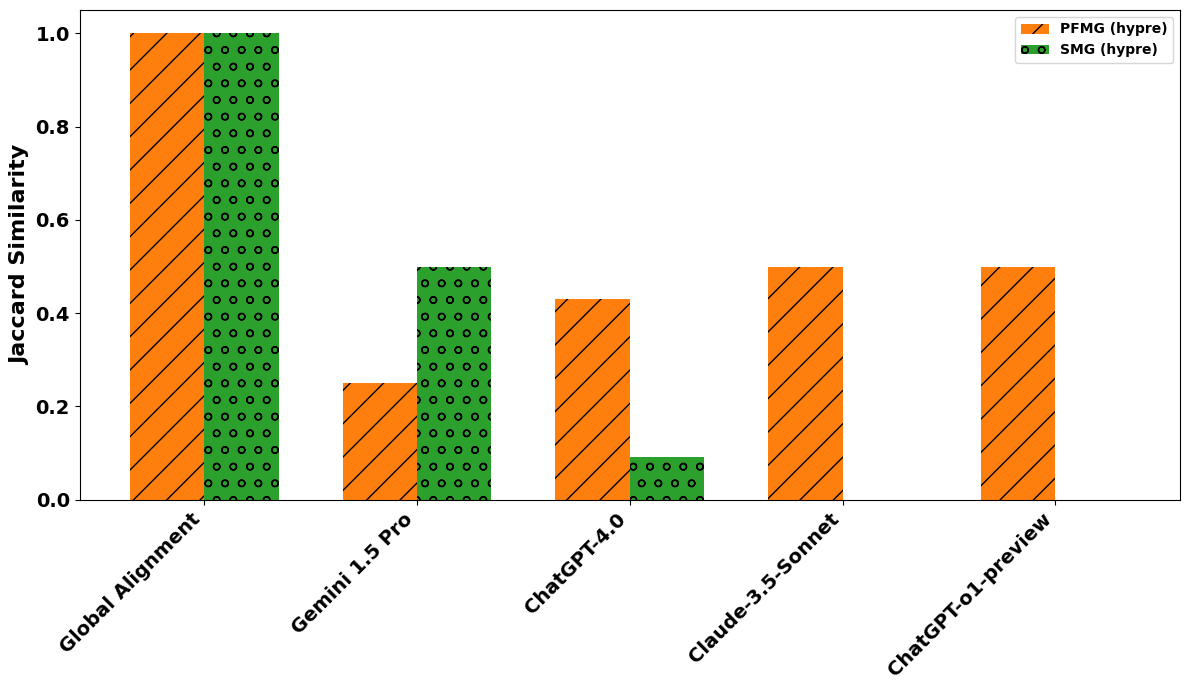

In [5]:
# import matplotlib.pyplot as plt
# import numpy as np
plt.clf()

# Data for Jaccard Similarity
models = ['Global Alignment', 'Gemini 1.5 Pro', 'ChatGPT-4.0', 'Claude-3.5-Sonnet', 'ChatGPT-o1-preview']
pfmg_values = [1, 0.25, 0.43, 0.5, 0.5]
smg_values = [1, 0.5, 0.0909, 0, 0]

# Set up the bar width and positions for the bars
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the bars for PFMG and SMG with new hatch styles
bar1 = ax.bar(index, pfmg_values, bar_width, label='PFMG (hypre)', color='#ff7f0e', hatch='/')  # Diagonal hatching
bar2 = ax.bar(index + bar_width, smg_values, bar_width, label='SMG (hypre)', color='#2ca02c', hatch='o')  # Circle hatching

# Set labels and font properties
# ax.set_xlabel('Models', fontsize=16, fontweight='bold')
ax.set_ylabel('Jaccard Similarity', fontsize=16, fontweight='bold')

# Bold the y-tick labels
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('bold')

# Set x-axis labels and their properties
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=14, fontweight='bold')

# Add legend with bold font
ax.legend(fontsize=14, prop={'weight': 'bold'})

# Display the plot
plt.tight_layout()
plt.savefig("LLM.png", format = 'png', dpi = 300)

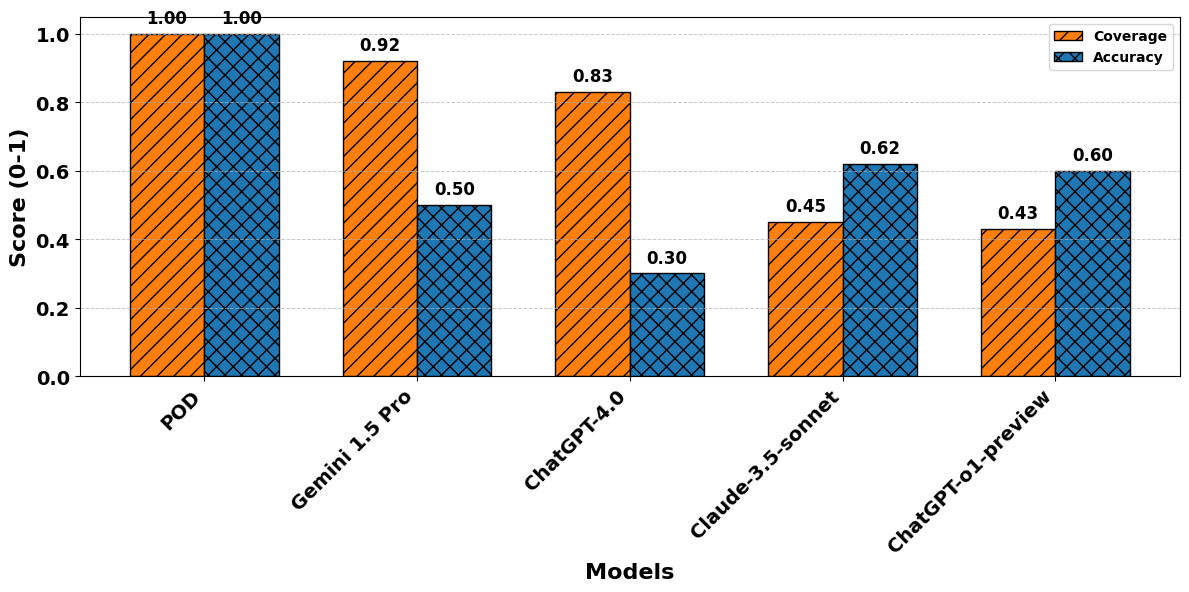

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
models = ['POD', 'Gemini 1.5 Pro', 'ChatGPT-4.0', 'Claude-3.5-sonnet', 'ChatGPT-o1-preview']
recall = [1.00, 0.92, 0.83, 0.45, 0.43]
precision = [1.00, 0.50, 0.30, 0.62, 0.60]

# Bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars with hatching styles
bar1 = ax.bar(index - bar_width / 2, recall, bar_width, label='Coverage', color='#FF7F0E', edgecolor='black', hatch='//')
bar2 = ax.bar(index + bar_width / 2, precision, bar_width, label='Accuracy', color='#1F77B4', edgecolor='black', hatch='xx')

# Add data labels on top of the bars
for i in range(len(recall)):
    ax.text(index[i] - bar_width / 2, recall[i] + 0.02, f'{recall[i]:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    ax.text(index[i] + bar_width / 2, precision[i] + 0.02, f'{precision[i]:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set labels, ticks, and legend
ax.set_xlabel('Models', fontsize=16, fontweight='bold')
ax.set_ylabel('Score (0-1)', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=14, fontweight='bold')
ax.legend(fontsize=14, frameon=True, loc='upper right', prop={'weight': 'bold'})

# Customize grid and y-axis tick styles
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels([f'{tick:.1f}' for tick in np.arange(0, 1.1, 0.2)], fontsize=14, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()